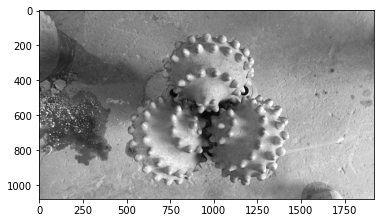

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/content/drive/MyDrive/trainingdata"

CATEGORIES = ["nonfailure", "failure"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  # create path to failure and nonfailure
    for img in os.listdir(path):  # iterate over each image per failure and nonfailure
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [ ]:
print(img_array)


[[189 193 187 ... 177 175 175]
 [181 188 189 ... 175 174 173]
 [182 187 190 ... 175 174 173]
 ...
 [125 126 130 ... 214 215 215]
 [125 127 129 ... 214 215 215]
 [130 133 133 ... 214 216 216]]


In [ ]:
print(img_array.shape)


(1080, 1920)


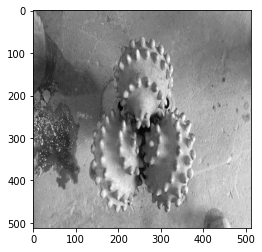

In [ ]:
IMG_SIZE = 512

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

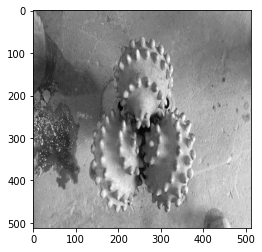

In [ ]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  # create path to failure and nonfailure
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=nonfailure 1=failure

        for img in tqdm(os.listdir(path)):  # iterate over each image per failure and nonfailure
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 1801/1801 [10:19<00:00,  2.91it/s]

2572


In [ ]:
import random

random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
1
1
0
1
1
1


In [ ]:
X = [] #traning images
y = [] #labels


In [ ]:
for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[146]
   [149]
   [152]
   ...
   [156]
   [162]
   [155]]

  [[146]
   [150]
   [141]
   ...
   [162]
   [160]
   [155]]

  [[150]
   [147]
   [149]
   ...
   [163]
   [158]
   [159]]

  ...

  [[195]
   [197]
   [193]
   ...
   [122]
   [127]
   [129]]

  [[192]
   [191]
   [200]
   ...
   [125]
   [122]
   [136]]

  [[195]
   [194]
   [199]
   ...
   [128]
   [132]
   [130]]]]


In [ ]:
import pickle

pickle_out = open("X1.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y1.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np

import pickle

pickle_in = open("X1.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y1.pickle","rb")
y = pickle.load(pickle_in)

X=np.array(X/255.0)
y=np.array(y)

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y,validation_split=0.2, batch_size=32, epochs=3)

Epoch 1/3


Another model

In [ ]:
import pickle

pickle_in = open("/content/drive/MyDrive/picklefiles/X1.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/picklefiles/y1.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np

In [ ]:
batch_size=32
steps_per_epoch = int( np.ceil(X.shape[0] / batch_size) )


In [ ]:
steps_per_epoch

81

In [ ]:
X

In [ ]:
X=np.array(X/255.0)
y=np.array(y)

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(128))
model.add(Activation('relu'))


model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(X, y,validation_split=0.2,validation_steps=16, batch_size=32, epochs=10,steps_per_epoch=81)

Epoch 1/10
81/81 [==============================] - 59s 288ms/step - loss: 1.0830 - accuracy: 0.6419 - val_loss: 0.4319 - val_accuracy: 0.8262
Epoch 2/10
81/81 [==============================] - 21s 259ms/step - loss: 0.3702 - accuracy: 0.8208 - val_loss: 0.3833 - val_accuracy: 0.8320
Epoch 3/10
81/81 [==============================] - 21s 261ms/step - loss: 0.2333 - accuracy: 0.8943 - val_loss: 0.4832 - val_accuracy: 0.8301
Epoch 4/10
81/81 [==============================] - 21s 263ms/step - loss: 0.1379 - accuracy: 0.9482 - val_loss: 0.6508 - val_accuracy: 0.8320
Epoch 5/10
81/81 [==============================] - 21s 263ms/step - loss: 0.1076 - accuracy: 0.9634 - val_loss: 0.6662 - val_accuracy: 0.8223
Epoch 6/10
81/81 [==============================] - 21s 265ms/step - loss: 0.0572 - accuracy: 0.9798 - val_loss: 0.8628 - val_accuracy: 0.8242
Epoch 7/10
81/81 [==============================] - 22s 266ms/step - loss: 0.0187 - accuracy: 0.9909 - val_loss: 1.1624 - val_accuracy: 0.8184

In [ ]:
model.save('/content/drive/MyDrive/picklefiles/trainedmodel/trained512.h5')


In [ ]:
# from tensorflow import keras
# model = keras.models.load_model('/content/drive/MyDrive/picklefiles/trainedmodel/trained512.h5')

In [ ]:
len(X) 

2572

In [ ]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
activation_17 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
activation_18 (Activation)   (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 128)        

In [ ]:
import matplotlib.pyplot as plt


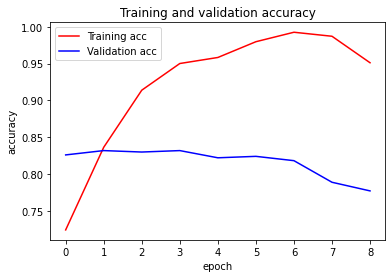

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.ylabel("accuracy") 
plt.xlabel("epoch")
plt.legend()
plt.figure()

plt.show()

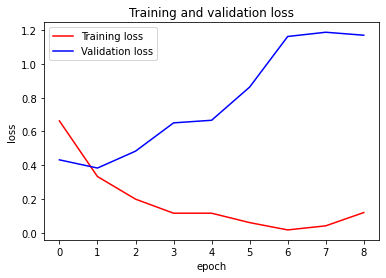

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.ylabel("loss") 
plt.xlabel("epoch")
plt.legend()

Another model

In [ ]:
X=np.array(X/255.0)
y=np.array(y)
classifier = Sequential()
classifier.add(Conv2D(32, 3, 3, input_shape =X.shape[1:], activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (3, 3)))

classifier.add(Conv2D(64, 3, 3, activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (3, 3)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units= 128, activation = 'relu'))
classifier.add(Dense( units=2, activation = 'softmax'))
# classifier.add(Dense(output_dim = 2, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history1=classifier.fit(X,y,validation_split=0.2,validation_steps=16,epochs =10,steps_per_epoch=81)

Epoch 1/10
81/81 [==============================] - 35s 38ms/step - loss: 0.5875 - accuracy: 0.6816 - val_loss: 0.4670 - val_accuracy: 0.7573
Epoch 2/10
81/81 [==============================] - 2s 26ms/step - loss: 0.4482 - accuracy: 0.7846 - val_loss: 0.7360 - val_accuracy: 0.7146
Epoch 3/10
81/81 [==============================] - 2s 26ms/step - loss: 0.4953 - accuracy: 0.7557 - val_loss: 0.4477 - val_accuracy: 0.7806
Epoch 4/10
81/81 [==============================] - 2s 26ms/step - loss: 0.4026 - accuracy: 0.8084 - val_loss: 0.3898 - val_accuracy: 0.8078
Epoch 5/10
81/81 [==============================] - 2s 26ms/step - loss: 0.3714 - accuracy: 0.8158 - val_loss: 0.3685 - val_accuracy: 0.8136
Epoch 6/10
81/81 [==============================] - 2s 26ms/step - loss: 0.3260 - accuracy: 0.8504 - val_loss: 0.3692 - val_accuracy: 0.8136
Epoch 7/10
81/81 [==============================] - 2s 26ms/step - loss: 0.3162 - accuracy: 0.8607 - val_loss: 0.3589 - val_accuracy: 0.8233
Epoch 8/10
8

In [ ]:
classifier.save('/content/drive/MyDrive/picklefiles/trainedmodel/trained2(512).h5')


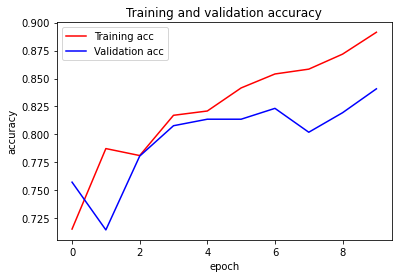

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.ylabel("accuracy") 
plt.xlabel("epoch")
plt.legend()
plt.figure()

plt.show()

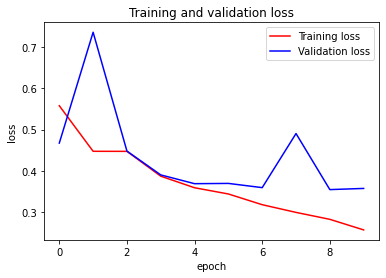

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.ylabel("loss") 
plt.xlabel("epoch")
plt.legend()